Project 1- Airbnb Analysis

In [195]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
from pprint import pprint
from scipy.stats import linregress
import numpy as np

In [196]:
#Import csv file

# df = pd.read_csv("Resources/listings.csv")
# master_df = pd.DataFrame(df)
# master_df = master_df.loc[df['number_of_reviews']>1,:]
# master_df = master_df[master_df["review_scores_rating"].notnull()]

In [221]:
# master_df.count()

In [265]:
#create subset of df with just amenity info
amenities_df = master_df.loc[:,["id","amenities","review_scores_rating"]]
amenities_df.head()

,id,amenities,review_scores_rating
0,360,"{TV,Wifi,""Air conditioning"",Kitchen,""Free stre...",100.0
1,590,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",96.0
2,592,"{Internet,Wifi,""Air conditioning"",Kitchen,""Fre...",97.0
3,686,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",95.0
4,1940,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",99.0


In [266]:
# amenities_df.iloc[0,1]

In [267]:
#create list of amenities to clean data:
amenity_lists = [amenities for amenities in amenities_df["amenities"]]

#cleanse amenities into a list of lists:
for counter, amenity_list in enumerate(amenity_lists):
    amenity_list_clean = amenity_list.replace('{','')
    amenity_list_clean = amenity_list_clean.replace('}','')
    amenity_list_clean = amenity_list_clean.replace('"','')
    amenity_list_clean = amenity_list_clean.split(',')
    amenity_lists[counter] = amenity_list_clean
print(amenity_lists[0])

['TV', 'Wifi', 'Air conditioning', 'Kitchen', 'Free street parking', 'Hot tub', 'Heating', 'Smoke detector', 'Carbon monoxide detector', 'First aid kit', 'Fire extinguisher', 'Essentials', 'Shampoo', 'Lock on bedroom door', 'Hangers', 'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Self check-in', 'Keypad', 'Bathtub', 'Hot water', 'Coffee maker', 'Refrigerator', 'Dishes and silverware', 'Cooking basics', 'Oven', 'Stove', 'BBQ grill', 'Patio or balcony', 'Garden or backyard', 'Luggage dropoff allowed', 'Long term stays allowed', 'Well-lit path to entrance']


In [268]:
#create list of how many amenities each property has
count_of_amenities = [len(amenity_list) for amenity_list in amenity_lists]

In [269]:
#replace amenities data in df with cleansed version, add count of amenities
amenities_df["amenities"] = amenity_lists
amenities_df["count of amenities"] = count_of_amenities
amenities_df.head()

,id,amenities,review_scores_rating,count of amenities
0,360,"[TV, Wifi, Air conditioning, Kitchen, Free str...",100.0,34
1,590,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",96.0,33
2,592,"[Internet, Wifi, Air conditioning, Kitchen, Fr...",97.0,19
3,686,"[TV, Cable TV, Internet, Wifi, Air conditionin...",95.0,27
4,1940,"[TV, Wifi, Air conditioning, Kitchen, Pets liv...",99.0,43


In [270]:
#create new df with average rating by number of amenities
amenity_count_groups = amenities_df.groupby(["count of amenities"])
properties_with_amenity_count = amenity_count_groups["id"].count()
average_score_by_amenity_count = amenity_count_groups["review_scores_rating"].mean()
count_rating_summary = pd.DataFrame({"Number of Properties":properties_with_amenity_count,
                                     "Average Review Score":average_score_by_amenity_count})
count_rating_summary.reset_index(inplace=True)
count_rating_summary.head()

,count of amenities,Number of Properties,Average Review Score
0,1,1,100.0
1,2,1,100.0
2,3,3,90.0
3,4,1,96.0
4,5,4,95.0


Text(0,0.5,'Average Rating')

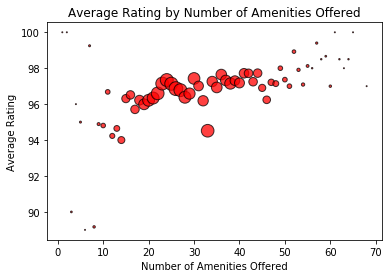

In [271]:
#create scatter plot of average rating by number of amenities
#bubble size weighted by number of properties
plt.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])

plt.title("Average Rating by Number of Amenities Offered")
plt.xlabel("Number of Amenities Offered")
plt.ylabel("Average Rating")

0.2883040226367375


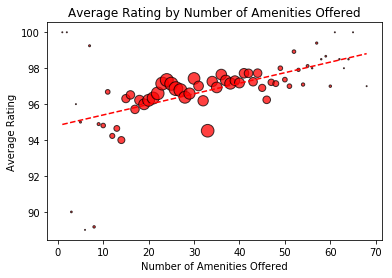

In [272]:
#saw a faint correlation, so running a linear regression and adding a line of best fit
(slope, intercept, r_value, p_value, std_error) = linregress(count_rating_summary["count of amenities"], count_rating_summary["Average Review Score"])
fit = slope * count_rating_summary["count of amenities"] + intercept

#r-squared value
r_squared = r_value ** 2
print(r_squared)

fig, ax = plt.subplots()

plt.title("Average Rating by Number of Amenities Offered")
plt.xlabel("Number of Amenities Offered")
plt.ylabel("Average Rating")

ax.scatter(count_rating_summary["count of amenities"],count_rating_summary["Average Review Score"],marker="o",facecolors="red",edgecolors="black",alpha=.75,s=count_rating_summary["Number of Properties"])
ax.plot(count_rating_summary["count of amenities"], fit, 'r--')

In [273]:
#create property ratings list
ratings = [rating for rating in amenities_df["review_scores_rating"]]

In [274]:
#create lists of unique amenities, how many properties had that amenity, and the sum of ratings for properties with that rating
unique_amenities = []
unique_amenity_count = []
total_amenity_rating = []

for counter,amenity_list in enumerate(amenities):
    for amenity in amenity_list:
        if amenity not in unique_amenities:
            unique_amenities.append(amenity)
            unique_amenity_count.append(1)
            total_amenity_rating.append(ratings[counter])
        else:
            unique_amenity_index = unique_amenities.index(amenity)
            unique_amenity_count[unique_amenity_index] += 1
            total_amenity_rating[unique_amenity_index] += ratings[counter]

In [275]:
#create dataframe for unique amenities
specific_amenity_summary = pd.DataFrame({"Amenity":unique_amenities,
                                         "Properties With Amenity":unique_amenity_count,
                                         "Sum of Rating":total_amenity_rating})
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating
0,TV,3571,345733.0
1,Wifi,4018,388821.0
2,Air conditioning,3324,322146.0
3,Kitchen,3756,363157.0
4,Free street parking,2317,225056.0


In [276]:
#add average rating to unique amenity summary
specific_amenity_summary["Average Rating"] = specific_amenity_summary["Sum of Rating"]/specific_amenity_summary["Properties With Amenity"]
specific_amenity_summary.head()

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
0,TV,3571,345733.0,96.816858
1,Wifi,4018,388821.0,96.769786
2,Air conditioning,3324,322146.0,96.915162
3,Kitchen,3756,363157.0,96.687167
4,Free street parking,2317,225056.0,97.132499


In [277]:
data_summary = specific_amenity_summary.describe()
data_summary

,Properties With Amenity,Sum of Rating,Average Rating
count,122.000000,122.000000,122.000000
mean,992.745902,96174.704918,96.977993
std,1225.826842,118712.513842,0.886680
min,1.000000,99.000000,93.523810
25%,75.250000,7226.500000,96.716979
50%,380.000000,36591.500000,97.025692
75%,1624.500000,157792.250000,97.349076
max,4022.000000,389108.000000,99.333333


In [278]:
#create subset of dataframe with just top and bottom 5 amenities
specific_amenity_summary.sort_values(["Average Rating"],ascending=False,inplace=True)
top_5 = specific_amenity_summary.iloc[0:5,:]

specific_amenity_summary.sort_values(["Average Rating"],ascending=True,inplace=True)
bottom_5 = specific_amenity_summary.iloc[0:5,:]

top_5_bottom_5 = top_5.append(bottom_5)
top_5_bottom_5

,Amenity,Properties With Amenity,Sum of Rating,Average Rating
115,Full kitchen,6,596.0,99.333333
121,Electric profiling bed,1,99.0,99.000000
112,Kitchenette,1,99.0,99.000000
110,Beach essentials,9,890.0,98.888889
109,Ground floor access,3,296.0,98.666667
94,Doorman,42,3928.0,93.523810
120,Roll-in shower,5,472.0,94.400000
83,Cleaning before checkout,141,13390.0,94.964539
103,toilet,40,3799.0,94.975000
102,Wide clearance to shower,40,3799.0,94.975000


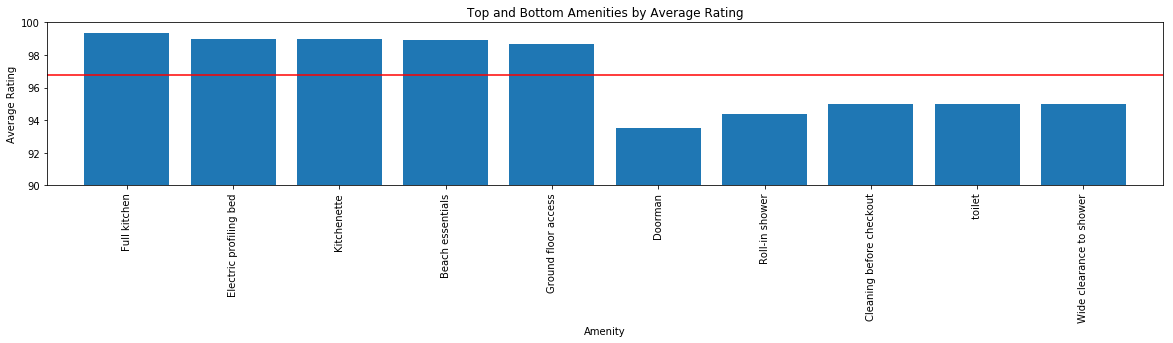

In [279]:
#barchart of top and bottom 5 amenities with line showing average rating
x_axis = np.arange(top_5_bottom_5["Amenity"].count())

plt.figure(figsize=(20,3))

plt.bar(x_axis,top_5_bottom_5["Average Rating"])
plt.xticks(x_axis,top_5_bottom_5["Amenity"],rotation=90)

average = top_5_bottom_5["Average Rating"].mean()
plt.hlines(average,-.75,122.25,color="r")

plt.xlim(-.75,len(x_axis)-.25)
plt.ylim(90,100)

plt.title("Top and Bottom Amenities by Average Rating")
plt.xlabel("Amenity")
plt.ylabel("Average Rating")

plt.show()